# COMP3340 Group Project Notebook 3

## Train the Models

Task: Image Classification with Oxford 17 Flower Dataset

Author: Wu Kunhuan, and other group members

------

## <font color='red'>**SETUP**</font>

Please select <font color='red'>ONE of the following methods</font> to setup the notebook. 

### <font color='red'>Upload Local Files (for Colab Users)</font>

First of all, setup a folder in Colab and put all the files including this notebook inside. 

Change the local path in Colab (By default, if you see "sample_data" in the sidebar, that means the current path is "/content"). 

For example, if all the files are in the "COMP3340_GP" folder in the same level of "sample_data", then the path is "/content/COMP3340_GP". 

In [ ]:
import os
path = "/content/COMP3340_GP"
project_dir = path; os.chdir(project_dir)
!ls  # You should see the files inside the folder if you state the right path. 

codes
configurations
datasets
figures
Image_Classification_Notebook_1_Introduction.ipynb
Image_Classification_Notebook_2_Setup.ipynb
Image_Classification_Notebook_3_Training.ipynb
Image_Classification_Notebook_4_Evaluating_Baseline.ipynb
README.md
shared
trained_models


### <font color='red'>Mount with Google Drive (for Google Drive Colab Users)</font>


Use the below cell to shut down Google Drive Kernel when necessary: 

Grant the access to your Google Drive: 

In [ ]:
get_ipython().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
path = "/content/drive/My Drive/Colab Projects/COMP3340_GP"
# plz manually specify the project directory
project_dir = path; os.chdir(project_dir)
!ls  # You should see the files inside the folder if you state the right path. 

codes
configurations
datasets
figures
Image_Classification_Notebook_1_Introduction.ipynb
Image_Classification_Notebook_2_Setup.ipynb
Image_Classification_Notebook_3_Training.ipynb
Image_Classification_Notebook_4_Evaluating_Baseline.ipynb
models
README.md
shared
trained_models


### <font color='red'>Other Users</font>

Other Users are those who run this notebook without Colab (e.g., run with VSCode, or Jupyter Lab with local servers)

You may skip the setup. Please ensure the below Module Setup codes output the right directory path (automatically detected). If not so, change the setup.path manually: 

```GP_setup.path = CORRECT_PATH_TO_YOUR_FOLDER```

<br/><br/>
# Module Setup

This Setup will download required packages by itself.

In [ ]:
import codes.setup as setup
GP_setup = setup.setup()

import codes.model as model

Start setting up ... (this may take some time to download packages)

Path: /content/COMP3340_GP
[Package] install pip successfully. 
[Package] import pytorch successfully. 
[Package] import numpy successfully. 
[Package] import torchvision successfully. 
[Package] import scikit-learn successfully. 
[Package] import seaborn successfully. 
[Package] import pandas successfully. 
[Package] install zip successfully. 
[Package] install unzip successfully. 
[Package] install wget successfully. 

COMP3340_GP setup finished. 


------

# 1. Import Dataset

Run this module to import the dataset for training, validation and testing. 

Run the ```Notebook 2``` to setup your datasets if it shows the dataset does not exist. However if you choose Uploading Local Files inside the setup, both ```Notebook 2``` and this notebook (```Notebook 3```) are having different runtime files. You may need to download the datasets created in ```Notebook 2``` runtime and upload them again here. 

Nonetheless, we are using Oxford_17 for this notebook. Simply run the following cell to create the dataset again: 

In [ ]:
import codes.Oxford_17_Dataset as Oxford
import codes.setup_default_dataset as setup_dataset
setup_dataset.setup_default_dataset(GP_setup)

Creating the Oxford_17 dataset. 
Distributing images into train, val and test datasets (8:1:1) ... Finished

COMP3340_GP default datasets are all created. 



------

**PARAMETERS**

dataset = import_dataset.import_dataset (GP_setup, ```dataset_name```)

In [ ]:
import codes.import_dataset as import_dataset
dataset = import_dataset.import_dataset (GP_setup, "Oxford_17")

Current datasets: ['Oxford_17']
Importing dataset Oxford_17 ... Finished
A total of 1088 train, 136 val and 136 test images. 


------

<br/><br/>
# 2. Train and save One Model

## 2.1 Overview

Baseline models: ```AlexNet```, ```VGG``` (VGG_11, VGG_13, VGG_16, VGG_19), ```ResNet``` (ResNet_18, ResNet_34, ResNet_50), ```Inception``` (Inception_V1, Inception_V4)

## 2.2 Preparation

Select one basic model OR define your own image classification models and put it inside the ```models``` folder to train. 

Your model.py should contain the model class definition (including ```def __init__(self)``` and ```def forward(self, x)``` functions). 

Select the model and set training configurations by setting the ```configurations/model.txt```.

## 2.3 Training

Run this module to train and save your model inside the ```trained_models``` folder. 

------
**PARAMETERS**

model.model (GP_setup, dataset, ```model```, ```loss_function```, ```optimizer```, ```learning_rate```, ```momentum```, ```epoches```, ```batch_size```, ```save_model_name```, False)

Finished training AlexNet (AlexNet) (lr = 0.0001, batch_size = 8)
Total Time: 10m 36s
Latest train loss: 324.4618591070175
Latest val accuracy: 0.23529411764705882
Latest val_5 accuracy: 0.6764705882352942


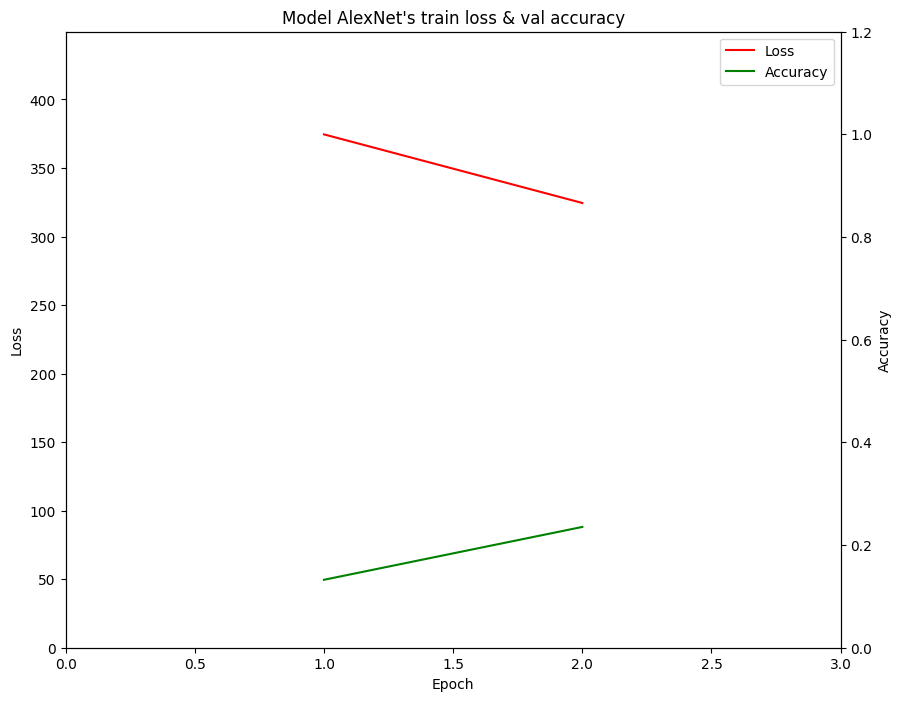

In [ ]:
model.model(GP_setup, dataset, 
            "AlexNet", "CrossEntropyLoss", "Adam", 
            0.0001, 0.9, 2, 8, "AlexNet", False)

------

## 3.2 Train and save Many Models
You may train a few models at the same time. This method will automatically OVERWRITE the saved models with the same ```save_model_name```, so be careful. 

------
**PARAMETERS**

model.model (GP_setup, dataset, ```model```, ```loss_function```, ```optimizer```, ```learning_rate```, ```momentum```, ```epoches```, ```batch_size```, ```save_model_name```, True)

------
### Learning Rates

You may train and compare the models of different learning rates. 

In [ ]:
# This is the previously trained model: 
# model.model (GP_setup, dataset, 
#              "AlexNet", "CrossEntropyLoss", "Adam", 
#              0.0001, 0.9, 2, 4, "AlexNet", True)

model.model (GP_setup, dataset, 
             "AlexNet", "CrossEntropyLoss", "Adam", 
             0.00003, 0.9, 2, 4, "AlexNet_1", True)
model.model (GP_setup, dataset, 
             "AlexNet", "CrossEntropyLoss", "Adam", 
             0.00001, 0.9, 2, 4, "AlexNet_2", True)
model.model (GP_setup, dataset, 
             "AlexNet", "CrossEntropyLoss", "Adam", 
             0.000003, 0.9, 2, 4, "AlexNet_3", True)

------
### Batch Sizes

You may train and compare the models of different batch sizes. 

In [ ]:
# This is the previously trained model: 
# model.model (GP_setup, dataset, 
#              "AlexNet", "CrossEntropyLoss", "Adam", 
#              0.0001, 0.9, 2, 4, "AlexNet", True)

model.model (GP_setup, dataset, 
             "AlexNet", "CrossEntropyLoss", "Adam", 
             0.0001, 0.9, 2, 8, "AlexNet_11", True)
model.model (GP_setup, dataset, 
             "AlexNet", "CrossEntropyLoss", "Adam", 
             0.0001, 0.9, 2, 16, "AlexNet_12", True)
model.model (GP_setup, dataset, 
             "AlexNet", "CrossEntropyLoss", "Adam", 
             0.0001, 0.9, 2, 32, "AlexNet_13", True)

------
### Model Backbones

You may train and compare the models of different backbones. 

In [ ]:
# This is the previously trained model: 
# model.model (GP_setup, dataset, 
#              "AlexNet", "CrossEntropyLoss", "Adam", 
#              0.0001, 0.9, 2, 4, "AlexNet", True)

model.model (GP_setup, dataset, 
             "VGG_11", "CrossEntropyLoss", "Adam", 
             0.0001, 0.9, 2, 4, "VGG_11", True)
model.model (GP_setup, dataset, 
             "ResNet_18", "CrossEntropyLoss", "Adam", 
             0.0001, 0.9, 2, 4, "ResNet_18", True)
model.model (GP_setup, dataset, 
             "Inception_V1", "CrossEntropyLoss", "Adam", 
             0.0001, 0.9, 2, 4, "Inception_V1", True)

------
### Datasets

Remember to reload the dataset before training if you want to use another dataset to train. 

Note the Oxford 17 Augmented dataset is prepared by us. 

In [ ]:
dataset = import_dataset.import_dataset (GP_setup, "Oxford_17_Augmented")
model.model (GP_setup, dataset, 
             "AlexNet", "CrossEntropyLoss", "Adam", 
             0.0001, 0.9, 2, 4, "AlexNet_aug", True)